<a href="https://colab.research.google.com/github/Ayona123/Drug_repurposing/blob/main/RDKit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Install RDKit.
%%capture
!pip install rdkit-pypi

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

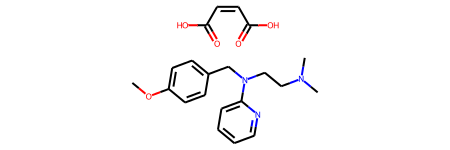

In [4]:
mol=Chem.MolFromSmiles ('COc1ccc(CN(CCN(C)C)c2ccccn2)cc1.O=C(O)/C=C\C(=O)O')
mol

In [5]:
smiles = Chem.MolToSmiles(mol)
smiles

'COc1ccc(CN(CCN(C)C)c2ccccn2)cc1.O=C(O)/C=C\\C(=O)O'

In [9]:
mw = Descriptors.MolWt(mol)
mw

401.46300000000014

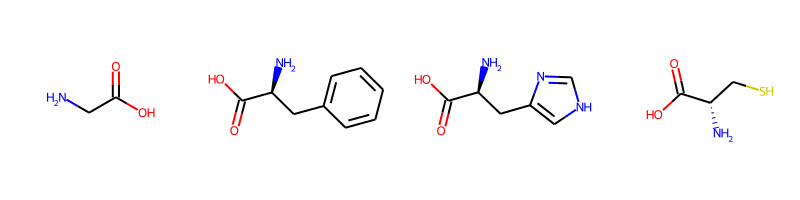

In [22]:
smiles_list = ['C(C(=O)O)N','N[C@@H](CC1=CC=CC=C1)C(O)=O',
               'O=C([C@H](CC1=CNC=N1)N)O','C([C@@H](C(=O)O)N)S']
mol_list = []
for smiles in smiles_list:
   mol=Chem.MolFromSmiles (smiles)
   mol_list.append (mol)

img = Draw.MolsToGridImage(mol_list, molsPerRow=4)
img


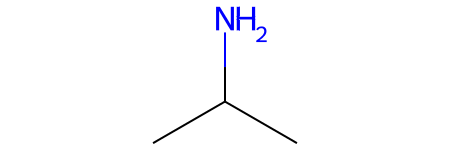

In [24]:
Chem.MolFromSmiles ('CC(N)C')

In [27]:
#pattern = Chem.MolFromSmiles ('S')
pattern = Chem.MolFromSmiles ('C(=O)O')
pattern = Chem.MolFromSmiles ('CC(N)C')
pattern = Chem.MolFromSmarts ('[r5]')

for mol in mol_list:
   print (mol.HasSubstructMatch (pattern))


False
False
True
False


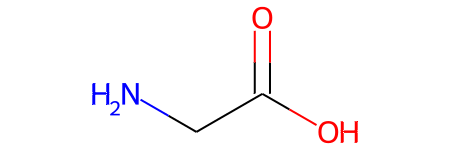

In [29]:
glycine = mol_list [0]
glycine

In [46]:
bi = {}

fp= AllChem.GetMorganFingerprintAsBitVect(glycine, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
np.nonzero(fp_arr)
list(fp.GetOnBits())

[27, 80, 147, 389, 650, 713, 807, 893, 966, 981]

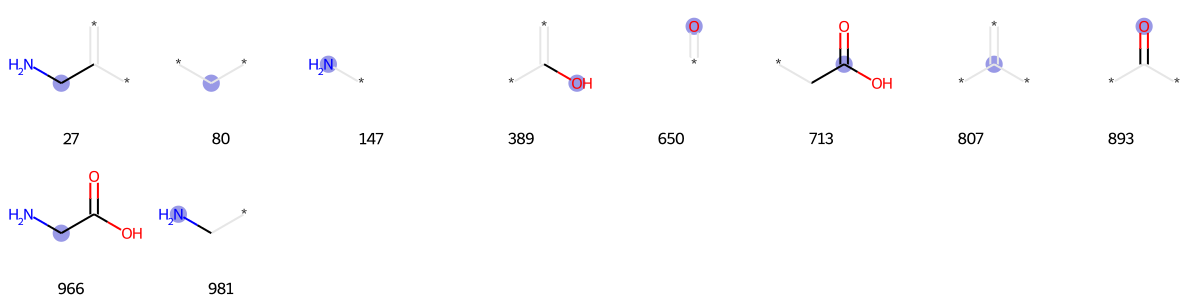

In [41]:
prints = [(glycine, x, bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp.GetOnBits ()])

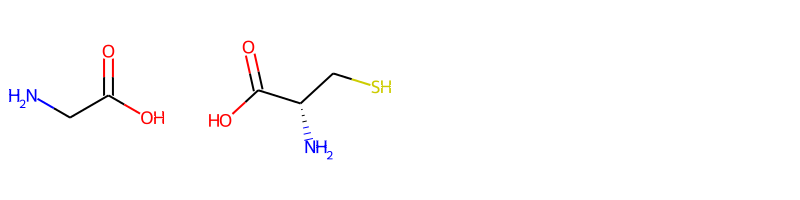

In [44]:
cysteine = mol_list [3]
img = Draw.MolsToGridImage ([glycine, cysteine], molsPerRow = 4)
img